In [3]:
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\renan\\OneDrive\\Documentos\\Python Scripts\\Machine_Learning\\exemplo2.csv')

df.head(10)

,idade,conta_corrente,risco
0,21.257389,783.127911,ruim
1,21.766573,979.747521,bom
2,25.321033,1065.328054,ruim
3,23.919268,1195.758078,bom
4,21.805298,1083.764450,bom
5,22.232574,1024.890088,ruim
6,24.922362,1387.785814,bom
7,21.744768,1217.385349,bom
8,27.452366,1084.478396,bom
9,22.517271,1325.818728,bom


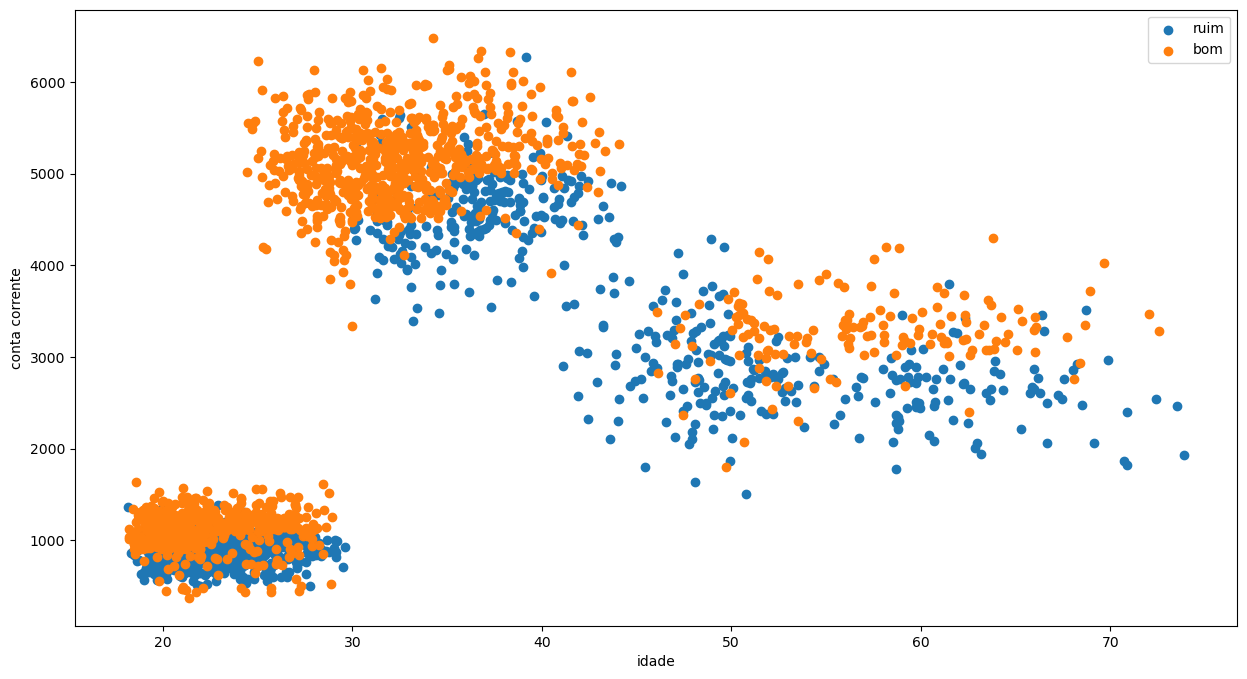

In [4]:
plt.figure(figsize=(15, 8))
plt.scatter(df[df.risco == 'ruim'].idade, df[df.risco == 'ruim'].conta_corrente)
plt.scatter(df[df.risco == 'bom'].idade, df[df.risco == 'bom'].conta_corrente)
plt.xlabel('idade')
plt.ylabel('conta corrente')
plt.legend(['ruim', 'bom'])

In [5]:
# Para efetuar o treinamento do classificador, guardaremos as variáveis de entrada em uma variáveis chamada X e a variável de saída em y. Para tanto, utilizaremos o comando DataFrame.drop('nome_da_coluna_excluida', axis=zero_para_linhas_um_para_colunas). Para o exemplo, eliminaremos a coluna risco das variáveis de entrada.

#Criando meu X q é constando no eixo 1 apagando 'risco'
X = df.drop('risco', axis=1)
#y recebe a coluna de risco
y = df.risco 

In [6]:
# Para executar o treinamento do classificador, criaremos um objeto da classe KNeighborsClassifier dando o nome de knn. Nesse exemplo, criaremos um KNN com número de vizinnhos igual a 3. Para tanto, passaremos o atributo n_neighbors=3. Para executar a treinamento do classificador, utilizamos o comando fit(X, y).

from sklearn.neighbors import KNeighborsClassifier
#estanciando e passando os (parametros) de qtde vizinho = 5
knn = KNeighborsClassifier(n_neighbors=5)

#treinando/ajustando a ia
knn.fit(X,y)

KNeighborsClassifier()

In [7]:
# Uma vez treinado, o classificador pode ser utilizado para determinar se um novo cliente possui risco bom ou ruim. Para tanto, utilizamos o comando predict(). Faremos a previsão do risco para um novo cliente com 18 anos e 700 reais na conta corrente.
knn.predict([[18,700]])

c:\Users\renan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['ruim'], dtype=object)

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Criaremos as variáveis X_train e y_train representando os inputs e outputs de treinamento e X_test, y_test representando os inputs e outputs de teste. Na função train_test_split() passaremos como parâmetro o conjunto completo de inputs e outputs X e y juntamente com o parâmetro test_size (tamanho do conjunto de teste), que configuraremos com o valor de 0.33 (1/3). Para fixar a aleatoriedade da divisão dos conjuntos, configuraremos o parâmetro random_state=42

X_treino,X_teste,y_treino,y_teste = train_test_split(X,y,test_size=1/3,random_state=42)

# *100 para exibir em procentagem
accuracy_score(y, knn.predict(X))*100



87.08

In [9]:
# Criaremos um novo classificador KNN configurado com n_neighbors=5 e o chamaremos de knn2. Uma vez treinado, calcularemos a acuracidade do classificador utilizando a função accuracy_score() que recebe como parâmetros os inputs conhecidos e os inputs previstos.

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_treino, y_treino)

accuracy_score(y_teste, knn2.predict(X_teste))*100

80.2158273381295

In [10]:
# Podemos aumentar a qualidade do classificador através do tratamento dos inputs. Para classificadores baseados em cálculo de distância, obetemos resultados melhores através da normalização das variáveis de input. Nesse caso, temos duas variáveis que possuem escalas distintas (idade e conta corrente). Aplicando uma função de normalização, podemos aumentar significamente a qualidade da acurácia.

# Para o exemplo, aplicaremos o normalizador MinMaxScaler, comprimindo os dados no intervalo entre 0 e 1. Criaremos um objeto da classe MinMaxScaler chamado normalizador e utilizaremos o comando MinMaxScaler.fit_transform() para ajustar o normalizador aos dados e executar a transformação do mesmo, passando como parâmetro os inputs X.

from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

array([[0.05586473, 0.06720224],
       [0.06499436, 0.09938945],
       [0.12872564, 0.11339923],
       ...,
       [0.85424954, 0.36522222],
       [0.62401886, 0.42781034],
       [0.61473291, 0.54031447]])

In [11]:
# Para verificar se houve melhoria na qualidade do classificador, repetimos o procedimento de teste.

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)

knn3 = KNeighborsClassifier(n_neighbors=5)
knn3.fit(X_train, y_train)

accuracy_score(y_test, knn3.predict(X_test))

0.8715151515151515

In [12]:

# Para dados normalizados, precisamos aplicar a mesma normalização executada nos dados de treinamento, nos dados de previsão utilizando o comando MinMaxScaler.transform(). Para prever o risco de um novo cliente com 18 anos e movimentação de 1000 reais, por exemplo, não podemos passar esses valores sem aplicar a normalização.

X_new = [[18, 1000]]
X_new = normalizador.transform(X_new)
knn3.predict(X_new)

c:\Users\renan\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array(['bom'], dtype=object)